# Diabetes Health Indicators Dataset

## Veri Seti Hikayesi

## Veri Seti Öznitelikleri:

Income:Gelir		
HighBP:		
HighChol:Kolestrol		
CholCheck:	Kolestrol Kontrolü (5 yıl içinde)	
BMI:	Vücut kitle indexi	
Smoker:	Hayatı boyunca 100 sigara içtin mi	1 ve 0
Stroke:	Felç geçirdin mi?	
HeartDiseaseorAttack:Kalp hastalığı veya krizi geçirdin mi?	
PhysActivity: Son 30 gün içinde fiziksel aktivite yaptın mı?	
Fruits:	Günde 1 veya daha fazla meyve yiyor musun?	
Veggies	Günde 1 veya daha fazla sebze yiyor musun?	
HvyAlcoholConsump:Haftalık alkol tüketimi
AnyHealthcare:	Sağlık sigprtası	
NoDocbcCost :  	Son 12 ayda doktora gitmeniz gerekip de maliyet nedeiyle gidemediğinzi oldu mu?	
GenHlth	Genel olarak sağlığınızı: 1ile 5 arası söyler misiniz?	
MenHlth:	Ruh sağlığı ölçeği	
PhysHlth:	Son 30 gün içinde fiziksel hastlık ve yaralanma ölçeği	
Diffwalk:	Yürümekte veya merdiven kullanmakta ciddi güçlük çekiyor musunuz?	
Sex:	Cinsiyet	
Age:Yaş	
Education: Eğitim		



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


# ADIM 1
## Veri setinin yüklenmesi:

In [3]:
data=pd.read_csv("/Users/ahmet/Library/Containers/com.microsoft.Excel/Data/Downloads/diabetes_012_health_indicators_BRFSS2015.csv")

In [5]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Veri setinin özellikleri:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [36]:
data.shape

(253680, 22)

# Adım 2

## Eksik değer analizi:

In [7]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# Adım 3

## Aykırı Değer Analizi:

### Bu kısımda tüm değiklenlerimizdeki aykırı değerleri görselleştirme yaparak(box plot yöntemi ile) ve sayısal olarak hangi değer aralığı dışında kalanların aykırı değer olacağını tespit ettik.

<AxesSubplot:xlabel='BMI'>

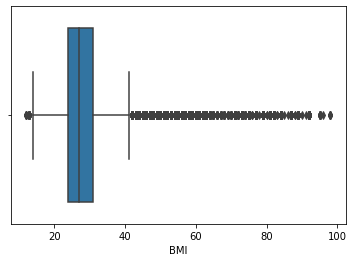

In [10]:
data_BMI=data['BMI']
sns.boxplot(x=data_BMI)

In [11]:
Q1=data_BMI.quantile(0.25)
Q3=data_BMI.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is13.5
upper bound is41.5
24.0
31.0


<AxesSubplot:xlabel='GenHlth'>

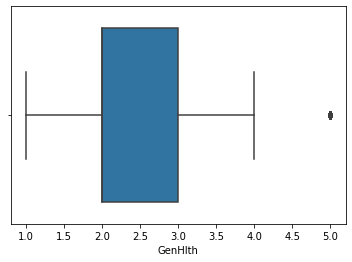

In [12]:
data_GenHlth=data['GenHlth']
sns.boxplot(x=data_GenHlth)

In [13]:
Q1=data_GenHlth.quantile(0.25)
Q3=data_GenHlth.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is0.5
upper bound is4.5
2.0
3.0


<AxesSubplot:xlabel='MentHlth'>

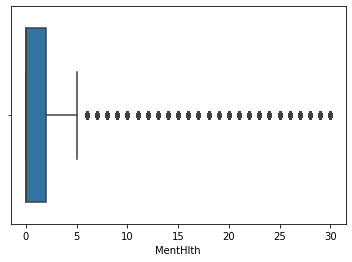

In [14]:
data_MentHlt =data['MentHlth']
sns.boxplot(x=data_MentHlt)

In [15]:
Q1=data_MentHlt.quantile(0.25)
Q3=data_MentHlt.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is-3.0
upper bound is5.0
0.0
2.0


<AxesSubplot:xlabel='PhysHlth'>

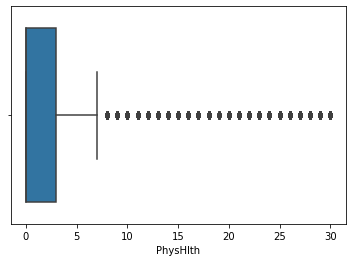

In [16]:
data_PhysHlth =data['PhysHlth']
sns.boxplot(x=data_PhysHlth)

In [17]:
Q1=data_PhysHlth.quantile(0.25)
Q3=data_PhysHlth.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print(Q1)
print(Q3)

lower bound is-4.5
upper bound is7.5
0.0
3.0


# Adım 4 

## Veri Setinin Bağımlı ve Bağımsız Değişkenler Olarak Ayrılması:

### Bu kısımda verimizdeki değerleri target ve features olarak ayırdık .Burada target bizim hedef değişkenimiz features ise özelliklerimizdir.


In [4]:
df = data.copy()
target = df["Diabetes_012"]
features= df.drop(['Diabetes_012'], axis=1)

# Adım 5

## Veri Ölçekleme

### Bu kısımda verimize standartlaştırma işlemi yaptık.

In [5]:
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

# Adım 6

## Veri Setini Test ve Train olarak ayırma:


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=0)

# Adım 7

## Algoritmaların Uygulanması:

### Artık algoritmaları uygulayabiliriz.Bu kısımda veri setimize decision tree,random forest ve adaboost algoritmalarını uygulayacağız.Algoritmaları accuracy score larına göre kıyasalayacağız.Ardından bütün algoritmalara 10 katlamalı çapraz doğrulama uygulayayıp tekrar bir accuracy score değeri hesaplayacağız.

## Decision Tree Algoritması:

#### Bu algoritmada paremetre olarak max_depth kullandım.Bu parametre için çeşitli denemeler yaptım.7,8,9,10,11,12,13,15,20 hepsini tek tek denedim.Accuracy score olarak en yüksek değeri 7 de elde ettim o yüzden onu tercih ettim.

In [11]:
from sklearn.tree import DecisionTreeClassifier

cart_grid = {"max_depth": range(10,20), "min_samples_split" : list(range(5,10))}
           
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
En iyi parametreler: {'max_depth': 10, 'min_samples_split': 9}


In [12]:
cart = DecisionTreeClassifier(max_depth= 10, min_samples_split = 9)
cart_tuned = cart.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8451723956690844

## Çapraz Doğrulama Uygulaması:

#### Ardından 10  katlamalı çapraz doğrulama uyguladım .Bu uygulamadan sonra da önceki değere yakın bir değer elde ettim bu modelin doğruluğu için önemliydi.

In [37]:
from sklearn.model_selection import cross_val_score

basari = cross_val_score(estimator = dtc , X=X_train, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.847513175818133
0.0010421951689878134


## Random Forest Algoritması:

#### Bu algoritmda ağaç sayısını paremetre olarak seçtim 10 ile 20 arasında çeşitli sayılar denedim .Gözlemlerime göre ağaç sayısını artırdıkça modelin doğruluk skorunda artış olmadığı yöndeydi o yüzden 14 ü seçtim.

In [22]:
rfc_param = {"max_depth": range(10,20)}
rfc = RandomForestClassifier()           
rfc_cv = GridSearchCV(rfc, rfc_param, cv = 10, n_jobs = -1, verbose = 2)
rfc_cv_model = rfc_cv.fit(X_train, y_train)
print("En iyi parametreler: " + str(rfc_cv_model.best_params_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
En iyi parametreler: {'max_depth': 12}


In [23]:
rfc = RandomForestClassifier(max_depth= 12)
rfc_tuned = rfc.fit(X_train, y_train)
y_pred = rfc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8488384316198886

## Çapraz Doğrulama Uygulaması:

#### Ardından 10  katlamalı çapraz doğrulama uyguladım .Bu uygulamadan sonra da önceki değere yakın bir değer elde ettim bu modelin doğruluğu için önemliydi.

In [38]:
from sklearn.model_selection import cross_val_score

basari = cross_val_score(estimator = rfc , X=X_train, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.8362560349148691
0.0013445039341179463


## Adaboost Algoritması:

#### Bu algoritmada ağaç sayısını parametre olarak seçtim . Çeşitli denemeler yaptıktan sonra 15 te karar kıldım.

In [7]:
ad = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=15)
ad.fit(X_train,y_train)
y_pred = ad.predict(X_test)
accuracy_score(y_test, y_pred)

0.8194181646168401

## Çapraz Doğrulama Uygulaması:

#### Ardından 10  katlamalı çapraz doğrulama uyguladım .Normal değerden daha iyi bir accuracy score elde ettim.

In [43]:
basari = cross_val_score(estimator = ad , X=X_train, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.8153241562713429
0.00629507570254237


# ADIM 8

## PCA UYGULAMASI

#### Türkçesi “Temel Bileşenler Analizi” olan PCA tanıma, sınıflandırma, görüntü sıkıştırma alanlarında kullanılan yararlı bir istatistiksel tekniktir. Temel amacı yüksek boyutlu verilerde en yüksek varyans ile veri setini tutmak ancak bunu yaparken boyut indirgemeyi sağlamak olan bir tekniktir. Fazla boyutlu verilerdeki genel özellikleri bularak boyut sayısının azaltılmasını, verinin sıkıştırılmasını sağlar. Boyut azalmasıyla bazı özelliklerin kaybedileceği kesindir; fakat amaçlanan, bu kaybolan özelliklerin popülasyon hakkında çok az bilgi içeriyor olmasıdır. Bu yöntem, yüksek korelasyonlu değişkenleri bir araya getirerek, verilerdeki en çok varyasyonu oluşturan “temel bileşenler” olarak adlandırılan daha az sayıda yapay değişken kümesi oluşturur.

## Import Edilmesi ve Fit edilmesi:

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)

X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)

## Decision Tree Algoritması(PCA'lı)

In [25]:
from sklearn.tree import DecisionTreeClassifier

cart_grid = {"max_depth": range(10,20), "min_samples_split" : list(range(5,10))}
           
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train2, y_train)
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
En iyi parametreler: {'max_depth': 10, 'min_samples_split': 7}


In [30]:
cart = DecisionTreeClassifier(max_depth= 10, min_samples_split = 7)
cart_tuned = cart.fit(X_train2, y_train)
y_pred = cart_tuned.predict(X_test2)
accuracy_score(y_test, y_pred)

0.8400478292862399

[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.9s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.8s
[CV] END ..................max_depth=10, min_samples_split=6; total time=   0.9s
[CV] END ..................max_depth=10, min_samples_split=7; total time=   0.8s
[CV] END ..................max_depth=10, min_samples_split=8; total time=   0.8s
[CV] END ..................max_depth=10, min_samples_split=9; total time=   0.8s
[CV] END ..................max_depth=10, min_samples_split=9; total time=   0.9s
[CV] END ..................max_depth=11, min_samples_split=5; total time=   0.9s
[CV] END ..................max_depth=11, min_samples_split=6; total time=   0.9s
[CV] END ..................max_depth=11, min_samples_split=7; total time=   0.9s
[CV] END ..................max_depth=11, min_samples_split=7; total time=   0.9s
[CV] END ..................max_depth=11, min_samples_split=8; total time=   0.9s
[CV] END ..................m

## Çapraz Doğrulama Uygulaması:
#### Ardından 10 katlamalı çapraz doğrulama uyguladım .Önceki değere yakın bir accuracy score elde ettim.

In [46]:
from sklearn.model_selection import cross_val_score

basari = cross_val_score(estimator =dtc , X=X_train2, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.8441287127443726
0.0010543189915941213


## Random Forest Algoritması(PCA'Lı)

In [33]:
rfc = RandomForestClassifier(max_depth= 10)
rfc_tuned = rfc.fit(X_train2, y_train)
y_pred = rfc_tuned.predict(X_test2)
accuracy_score(y_test, y_pred)

0.8436481656680332

## Çapraz Doğrulama Uygulaması:
### Ardından 10 katlamalı çapraz doğrulama uyguladım .Önceki değere yakın bir accuracy score elde ettim.

In [48]:
basari = cross_val_score(estimator =rfc , X=X_train2, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.8309568955143286
0.0011907946405818857


## Adaboost algoritması(PCA'LI)

In [ ]:
ad = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=15)
ad.fit(X_train2,y_train)
y_pred = ad.predict(X_test2)
accuracy_score(y_test, y_pred)

## Çapraz Doğrulama Uygulaması:
Ardından 10 katlamalı çapraz doğrulama uyguladım .Önceki değere yakın bir accuracy score elde ettim.

In [ ]:
from sklearn.model_selection import cross_val_score

basari = cross_val_score(estimator = ad, X=X_train2, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())